# **UNDUH BEBERAPA LIBARY**

In [1]:
# !pip install --upgrade xgboost
# !pip install --upgrade scikit-learn==1.5.2

In [2]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.7 MB/s eta 0:00:00


In [3]:

!pip install researchpy
!pip install skfeature-chappers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.7 MB/s eta 0:00:00


# **LIBRARY**

In [4]:
import numpy as np
import pandas as pd
from time import time
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



import researchpy as rp
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer, Categorical

# **DATA EXPROLASI**

In [5]:
file = pd.read_excel('/content/drive/MyDrive/dokumen/laporan skripsi salma/DATASETKU/data stunting file.xlsx')
data = file.drop(['Column1', 'gabung', 'chHeight', 'height', '(-1sd)', 'median', '1sd', 'haz'], axis=1)
data.head(100000)

,chAge,chSex,status,chSize,chBw,db,breaststart,chDiar,chDrug,delPlace,...,nChild,residence,wi,water,toilet,region,altitudes,reading,tv,radio
0,37,m,stunting,small,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,no,yes,facility,...,more than 3,rural,rich,improved,improved,kigali,<=2000,no,no,no
1,10,f,normal,large,more than 2.5,still breastfeeding,1hr,no,no,facility,...,more than 3,rural,rich,improved,improved,kigali,<=2000,no,no,no
2,53,f,normal,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,no,yes,facility,...,more than 3,rural,rich,improved,improved,kigali,<=2000,no,no,no
3,59,f,normal,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,no,yes,facility,...,more than 3,rural,rich,improved,improved,kigali,<=2000,yes,yes,no
4,32,f,stunting,small,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,no,yes,facility,...,1 child,rural,rich,improved,improved,kigali,<=2000,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,47,m,stunting,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,no,yes,facility,...,2 child,rural,middle,improved,improved,est,<=2000,no,no,no
3810,34,m,stunting,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,yes,no,facility,...,more than 3,rural,middle,improved,unimproved,est,<=2000,no,no,yes
3811,40,m,normal,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,no,yes,facility,...,1 child,rural,middle,improved,unimproved,est,<=2000,no,no,no
3812,38,f,normal,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,no,yes,facility,...,1 child,rural,middle,improved,improved,est,<=2000,no,no,no


In [76]:
data.columns

Index(['chAge', 'chSex', 'status', 'chSize', 'chBw', 'db', 'breaststart',
       'chDiar', 'chDrug', 'delPlace', 'MmAge', 'MmEdu', 'MomAnem', 'MomWork',
       'Mmstat', 'MmHeight', 'BMI', 'antenatal', 'nChild', 'residence', 'wi',
       'water', 'toilet', 'region', 'altitudes', 'reading', 'tv', 'radio'],
      dtype='object')

In [6]:
file.head(1000000000)

,Column1,chAge,chSex,chHeight,gabung,height,(-1sd),median,1sd,haz,...,nChild,residence,wi,water,toilet,region,altitudes,reading,tv,radio
0,1,37,m,891,37m,89.1,93.0,96.7,100.5,-2.054054,...,more than 3,rural,rich,improved,improved,kigali,<=2000,no,no,no
1,2,10,f,697,10f,69.7,69.0,71.5,73.9,-0.720000,...,more than 3,rural,rich,improved,improved,kigali,<=2000,no,no,no
2,3,53,f,1004,53f,100.4,101.1,105.6,110.1,-1.155556,...,more than 3,rural,rich,improved,improved,kigali,<=2000,no,no,no
3,4,59,f,1029,59f,102.9,104.2,108.9,113.6,-1.276596,...,more than 3,rural,rich,improved,improved,kigali,<=2000,yes,yes,no
4,5,32,f,828,32f,82.8,88.6,92.2,95.8,-2.611111,...,1 child,rural,rich,improved,improved,kigali,<=2000,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,3810,47,m,941,47m,94.1,98.6,102.8,106.9,-2.071429,...,2 child,rural,middle,improved,improved,est,<=2000,no,no,no
3810,3811,34,m,866,34m,86.6,91.1,94.8,98.4,-2.216216,...,more than 3,rural,middle,improved,unimproved,est,<=2000,no,no,yes
3811,3812,40,m,973,40m,97.3,94.7,98.6,102.5,-0.333333,...,1 child,rural,middle,improved,unimproved,est,<=2000,no,no,no
3812,3813,38,f,941,38f,94.1,92.5,96.4,100.3,-0.589744,...,1 child,rural,middle,improved,improved,est,<=2000,no,no,no


In [7]:
data.shape

(3814, 28)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chAge        3814 non-null   int64 
 1   chSex        3814 non-null   object
 2   status       3814 non-null   object
 3   chSize       3793 non-null   object
 4   chBw         3618 non-null   object
 5   db           3814 non-null   object
 6   breaststart  3783 non-null   object
 7   chDiar       3814 non-null   object
 8   chDrug       3814 non-null   object
 9   delPlace     3814 non-null   object
 10  MmAge        3814 non-null   int64 
 11  MmEdu        3814 non-null   object
 12  MomAnem      3812 non-null   object
 13  MomWork      3814 non-null   object
 14  Mmstat       3814 non-null   object
 15  MmHeight     3814 non-null   int64 
 16  BMI          3814 non-null   object
 17  antenatal    2969 non-null   object
 18  nChild       3814 non-null   object
 19  residence    3814 non-null 

In [9]:
data['status'].value_counts()

,count
status,
normal,2691
stunting,1123


In [10]:
print("Jumlah Missing Value :",data.isnull().sum().sum())
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data,
        percent_of_missing_data#
    ],
    axis=1,
    keys=['Total', 'Percent']
)
print(missing_data.head(30))

Jumlah Missing Value : 1295
             Total    Percent
antenatal      845  22.155218
chBw           196   5.138962
tv              50   1.310960
toilet          50   1.310960
water           50   1.310960
radio           50   1.310960
breaststart     31   0.812795
chSize          21   0.550603
MomAnem          2   0.052438
chSex            0   0.000000
status           0   0.000000
chAge            0   0.000000
MmEdu            0   0.000000
MmAge            0   0.000000
delPlace         0   0.000000
chDrug           0   0.000000
chDiar           0   0.000000
db               0   0.000000
Mmstat           0   0.000000
MomWork          0   0.000000
residence        0   0.000000
nChild           0   0.000000
BMI              0   0.000000
MmHeight         0   0.000000
region           0   0.000000
wi               0   0.000000
reading          0   0.000000
altitudes        0   0.000000


<Axes: ylabel='MmHeight'>

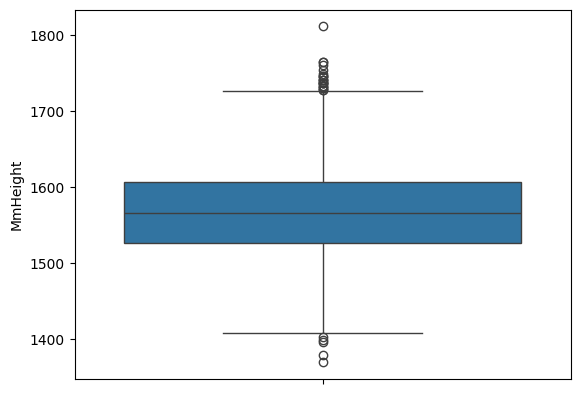

In [11]:
sns.boxplot (data['MmHeight'])

<Axes: ylabel='MmAge'>

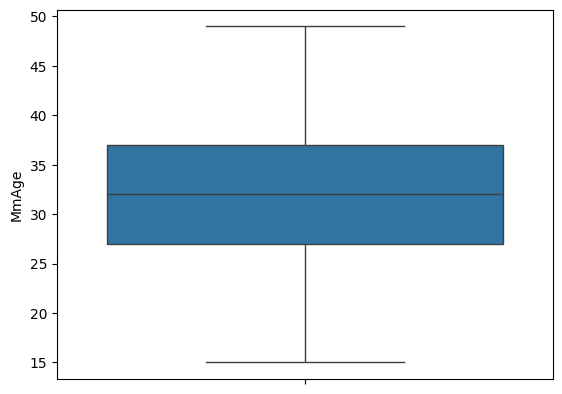

In [12]:
sns.boxplot (data['MmAge'])

<Axes: ylabel='chAge'>

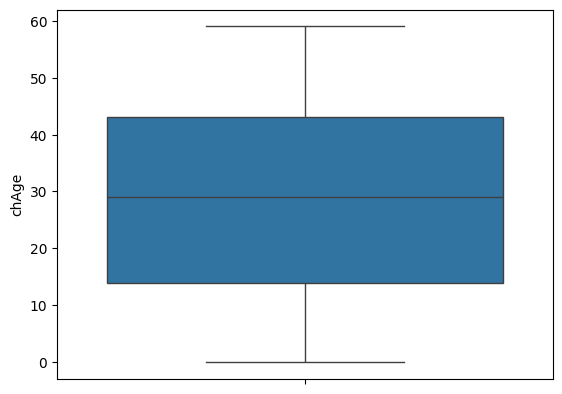

In [13]:
sns.boxplot (data['chAge'])

In [14]:
print("Jumlah Data Duplikat:",data.duplicated().sum())

Jumlah Data Duplikat: 3


# **CLEANING DATA**

In [15]:
new= data.copy()

In [16]:
dt = new.drop_duplicates()

In [17]:
print("Jumlah Data Duplikat:",dt.duplicated().sum())
print("Jumlah Dataset Sebelum Data Duplikat dihapus:",data.shape)
print("Jumlah Dataset Setelah Data Duplikat dihapus:",dt.shape)

Jumlah Data Duplikat: 0
Jumlah Dataset Sebelum Data Duplikat dihapus: (3814, 28)
Jumlah Dataset Setelah Data Duplikat dihapus: (3811, 28)


In [18]:
df= dt.drop(["antenatal"],axis=1)

In [19]:
dp  = df.dropna()

In [20]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3541 entries, 0 to 3813
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chAge        3541 non-null   int64 
 1   chSex        3541 non-null   object
 2   status       3541 non-null   object
 3   chSize       3541 non-null   object
 4   chBw         3541 non-null   object
 5   db           3541 non-null   object
 6   breaststart  3541 non-null   object
 7   chDiar       3541 non-null   object
 8   chDrug       3541 non-null   object
 9   delPlace     3541 non-null   object
 10  MmAge        3541 non-null   int64 
 11  MmEdu        3541 non-null   object
 12  MomAnem      3541 non-null   object
 13  MomWork      3541 non-null   object
 14  Mmstat       3541 non-null   object
 15  MmHeight     3541 non-null   int64 
 16  BMI          3541 non-null   object
 17  nChild       3541 non-null   object
 18  residence    3541 non-null   object
 19  wi           3541 non-null   obj

In [21]:
print("Jumlah Missing Value Sebelum Penanganan:",data.isnull().sum().sum())
print("Jumlah Missing Value Setelah Penanganan:",dp.isnull().sum().sum())
print("Jumlah Dataset Sebelum Penanganan Missing value:",dt.shape)
print("Jumlah Dataset Setelah Penanganan Missing value:",dp.shape)

Jumlah Missing Value Sebelum Penanganan: 1295
Jumlah Missing Value Setelah Penanganan: 0
Jumlah Dataset Sebelum Penanganan Missing value: (3811, 28)
Jumlah Dataset Setelah Penanganan Missing value: (3541, 27)


In [22]:
total_missing_data = dp.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (dp.isnull().sum()/dp.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data,
        percent_of_missing_data#
    ],
    axis=1,
    keys=['Total', 'Percent']
)
print(missing_data.head(30))

             Total  Percent
chAge            0      0.0
chSex            0      0.0
status           0      0.0
chSize           0      0.0
chBw             0      0.0
db               0      0.0
breaststart      0      0.0
chDiar           0      0.0
chDrug           0      0.0
delPlace         0      0.0
MmAge            0      0.0
MmEdu            0      0.0
MomAnem          0      0.0
MomWork          0      0.0
Mmstat           0      0.0
MmHeight         0      0.0
BMI              0      0.0
nChild           0      0.0
residence        0      0.0
wi               0      0.0
water            0      0.0
toilet           0      0.0
region           0      0.0
altitudes        0      0.0
reading          0      0.0
tv               0      0.0
radio            0      0.0


In [23]:
baru = dp.copy()

<Axes: ylabel='MmHeight'>

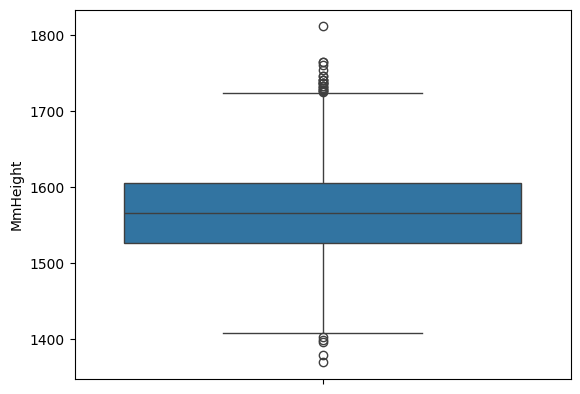

In [24]:
sns.boxplot (baru['MmHeight'])

In [25]:
# IQR
Q1 = np.percentile(baru['MmHeight'], 25, method='midpoint')
Q3 = np.percentile(baru['MmHeight'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

79.0


In [26]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(baru['MmHeight'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(baru['MmHeight'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 1723.5
22
Lower Bound: 1407.5
5


In [27]:
new_data = baru
new_data['MmHeight'] = np.where(new_data['MmHeight']>upper,upper,new_data['MmHeight'])
new_data['MmHeight'] = np.where(new_data['MmHeight']<lower,lower,new_data['MmHeight'])

Previous Shape With Outlier:  (3541, 27)
Shape After Removing Outliers: (3541, 27)


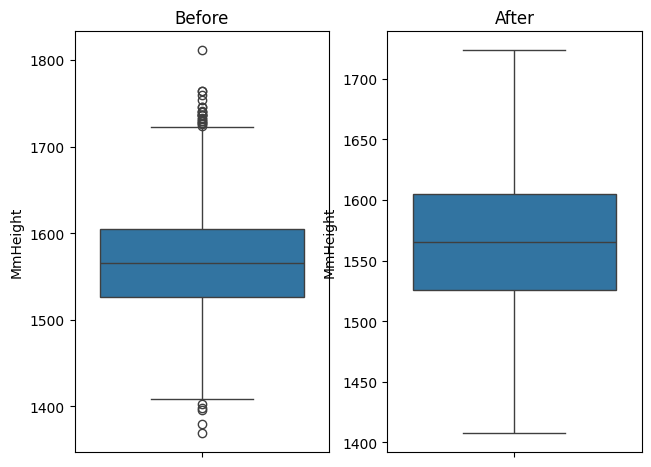

In [28]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()
print("Previous Shape With Outlier: ",dp.shape)
sns.boxplot(dp['MmHeight'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")


print("Shape After Removing Outliers:", new_data.shape)

sns.boxplot(new_data['MmHeight'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (3541, 27)
Shape After Removing Outliers: (3541, 27)


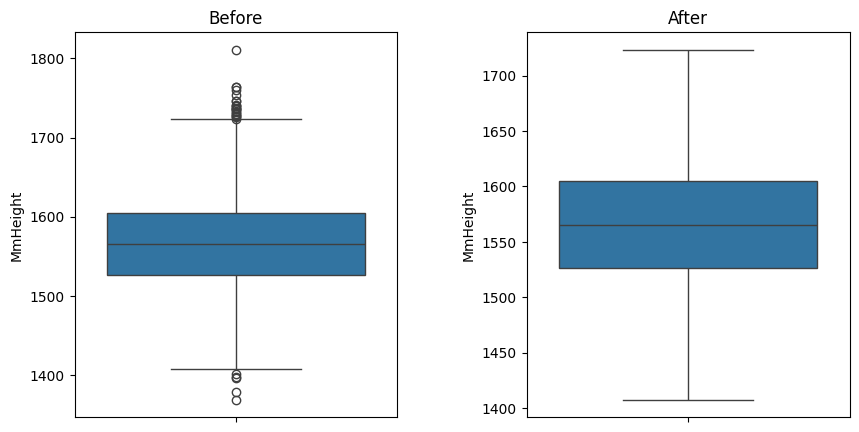

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dengan ukuran lebih lebar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # ukuran diperbesar
plt.subplots_adjust(wspace=0.4)  # atur jarak antar plot secara manual

# Sebelum outlier dihapus
print("Previous Shape With Outlier: ", dp.shape)
sns.boxplot(y=dp['MmHeight'], ax=axes[0])
axes[0].set_title("Before")

# Setelah outlier dihapus
print("Shape After Removing Outliers:", new_data.shape)
sns.boxplot(y=new_data['MmHeight'], ax=axes[1])
axes[1].set_title("After")

plt.show()


In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3541 entries, 0 to 3813
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chAge        3541 non-null   int64  
 1   chSex        3541 non-null   object 
 2   status       3541 non-null   object 
 3   chSize       3541 non-null   object 
 4   chBw         3541 non-null   object 
 5   db           3541 non-null   object 
 6   breaststart  3541 non-null   object 
 7   chDiar       3541 non-null   object 
 8   chDrug       3541 non-null   object 
 9   delPlace     3541 non-null   object 
 10  MmAge        3541 non-null   int64  
 11  MmEdu        3541 non-null   object 
 12  MomAnem      3541 non-null   object 
 13  MomWork      3541 non-null   object 
 14  Mmstat       3541 non-null   object 
 15  MmHeight     3541 non-null   float64
 16  BMI          3541 non-null   object 
 17  nChild       3541 non-null   object 
 18  residence    3541 non-null   object 
 19  wi         

# **SELEKSI FITUR**

In [31]:
for i in new_data.columns:
    crosstab, test_results, expected = rp.crosstab(new_data[i], new_data["status"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(crosstab)
    print(test_results)
    print("=======================")


# #sex=pd.crosstab(dataf['Sex'], dataf['stunting'])
# #print(sex)
# print(crosstab)
# test_results

       status                 
status normal stunting     All
chAge                         
0        1.61     0.11    1.72
1        1.27     0.23    1.50
2        1.52     0.11    1.64
3        2.01     0.03    2.03
4        1.58     0.25    1.84
...       ...      ...     ...
56       1.10     0.59    1.69
57       1.10     0.56    1.67
58       0.90     0.34    1.24
59       1.19     0.56    1.75
All     71.14    28.86  100.00

[61 rows x 3 columns]
                 Chi-square test   results
0  Pearson Chi-square ( 59.0) =   221.2681
1                     p-value =     0.0000
2                  Cramer's V =     0.2500
       status                 
status normal stunting     All
chSex                         
f       37.16    12.37   49.53
m       33.97    16.49   50.47
All     71.14    28.86  100.00
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   25.6209
1                    p-value =    0.0000
2               Cramer's phi =    0.0851
         status      

In [32]:
# prompt: short kolom yang nilai cramer's v lebih dari 0.1

# Assuming 'crosstab', 'test_results', and 'expected' are defined from the previous code block
# and contain the results of the chi-square test for each column.

# Initialize an empty list to store columns with Cramer's V > 0.1
columns_to_keep = []

for i in new_data.columns:
    crosstab, test_results, expected = rp.crosstab(new_data[i], new_data["status"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

    # Extract Cramer's V from the test results
    cramers_v = test_results['results'][2]  # Assuming Cramer's V is at index 2

    if cramers_v > 0.06:
        columns_to_keep.append(i)

# Print the columns to keep
print(f"Columns with Cramer's V > 0.05: {columns_to_keep}")

# Create a new DataFrame with only the selected columns
dp_filtered1 = new_data[columns_to_keep]
dp_filtered1


Columns with Cramer's V > 0.05: ['chAge', 'chSex', 'status', 'chSize', 'chBw', 'db', 'breaststart', 'chDrug', 'MmAge', 'MmEdu', 'MmHeight', 'BMI', 'nChild', 'residence', 'wi', 'toilet', 'region', 'altitudes', 'reading', 'tv', 'radio']


,chAge,chSex,status,chSize,chBw,db,breaststart,chDrug,MmAge,MmEdu,...,BMI,nChild,residence,wi,toilet,region,altitudes,reading,tv,radio
0,37,m,stunting,small,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,yes,36,second or higher,...,normal,more than 3,rural,rich,improved,kigali,<=2000,no,no,no
1,10,f,normal,large,more than 2.5,still breastfeeding,1hr,no,38,second or higher,...,normal,more than 3,rural,rich,improved,kigali,<=2000,no,no,no
2,53,f,normal,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,yes,38,second or higher,...,normal,more than 3,rural,rich,improved,kigali,<=2000,no,no,no
3,59,f,normal,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,yes,44,second or higher,...,obses,more than 3,rural,rich,improved,kigali,<=2000,yes,yes,no
4,32,f,stunting,small,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,yes,21,primary,...,Overweight,1 child,rural,rich,improved,kigali,<=2000,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,47,m,stunting,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,yes,33,primary,...,Overweight,2 child,rural,middle,improved,est,<=2000,no,no,no
3810,34,m,stunting,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,no,36,no,...,normal,more than 3,rural,middle,unimproved,est,<=2000,no,no,yes
3811,40,m,normal,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,yes,25,primary,...,normal,1 child,rural,middle,unimproved,est,<=2000,no,no,no
3812,38,f,normal,large,more than 2.5,"ever breastfed, not currently breastfeeding",1hr,yes,25,primary,...,Overweight,1 child,rural,middle,improved,est,<=2000,no,no,no


'chAge', 'chSex', 'status', 'chSize', 'chBw', 'db', 'breaststart', 'chDiar', 'chDrug', 'MmAge', 'MmEdu', 'MomWork', 'Mmstat', 'MmHeight', 'BMI', 'nChild', 'residence', 'wi', 'water', 'toilet', 'region', 'altitudes', 'reading', 'tv', 'radio'

In [33]:
dp_filtered1.columns

Index(['chAge', 'chSex', 'status', 'chSize', 'chBw', 'db', 'breaststart',
       'chDrug', 'MmAge', 'MmEdu', 'MmHeight', 'BMI', 'nChild', 'residence',
       'wi', 'toilet', 'region', 'altitudes', 'reading', 'tv', 'radio'],
      dtype='object')

In [34]:
import pandas as pd
import researchpy as rp

# Dictionary untuk menyimpan nilai Cramer's V
cramers_v_scores = {}

# Menghitung Cramer's V untuk setiap atribut terhadap 'status'
for col in new_data.columns:
    if col != "status":
        crosstab, test_results, expected = rp.crosstab(new_data[col], new_data["status"],
                                                       test="chi-square",
                                                       expected_freqs=True,
                                                       prop="cell")
        try:
            cramers_v = test_results['results'][2]  # Index 2: Cramer's V
            cramers_v_scores[col] = cramers_v
        except:
            continue  # Lewati jika error (misal karena nilai tidak valid)

# Mengambil 10 atribut dengan Cramer's V tertinggi
top_10_columns = sorted(cramers_v_scores, key=cramers_v_scores.get, reverse=True)[:24]

# Tampilkan nama kolom dan nilai Cramer's V-nya
for col in top_10_columns:
    print(f"{col}: {cramers_v_scores[col]}")

# Membuat DataFrame baru dengan kolom-kolom terpilih
dp_filtered_top10 = new_data[top_10_columns]


MmHeight: 0.3599
chAge: 0.25
wi: 0.2214
tv: 0.1803
radio: 0.1594
MmEdu: 0.1523
chSize: 0.1417
chDrug: 0.1388
chBw: 0.134
region: 0.1231
toilet: 0.1226
breaststart: 0.1195
MmAge: 0.1188
residence: 0.1185
db: 0.1177
altitudes: 0.1176
BMI: 0.1076
reading: 0.1
chSex: 0.0851
nChild: 0.0614
Mmstat: 0.06
MomWork: 0.0574
water: 0.0555
chDiar: 0.0503


In [35]:
import pandas as pd
import researchpy as rp

# Dictionary untuk menyimpan atribut yang memenuhi kondisi
low_significance_columns = {}

# Loop semua kolom kecuali target
for col in new_data.columns:
    if col != "status":
        try:
            crosstab, test_results, expected = rp.crosstab(new_data[col], new_data["status"],
                                                           test="chi-square",
                                                           expected_freqs=True,
                                                           prop="cell")

            p_value = test_results['results'][1]  # Index 1: p-value
            cramers_v = test_results['results'][2]  # Index 2: Cramer's V

            # Kondisi: (p-value > 0.05 and Cramer's V < 0.05) OR (p-value > 0.05) OR (Cramer's V < 0.05)
            if (p_value > 0.05 and cramers_v < 0.05) or (p_value > 0.05) or (cramers_v < 0.05):
                low_significance_columns[col] = {'p_value': p_value, 'cramers_v': cramers_v}

        except Exception as e:
            continue  # Lewati jika error

# Tampilkan hasil
print("Atribut yang memiliki p-value > 0.05 atau Cramer's V < 0.05:\n")
for col, stats in low_significance_columns.items():
    print(f"{col}: p-value = {stats['p_value']:.4f}, Cramer's V = {stats['cramers_v']:.4f}")


Atribut yang memiliki p-value > 0.05 atau Cramer's V < 0.05:

delPlace: p-value = 0.0327, Cramer's V = 0.0439
MomAnem: p-value = 0.4263, Cramer's V = 0.0134


In [36]:
dp_filtered_top10.columns

Index(['MmHeight', 'chAge', 'wi', 'tv', 'radio', 'MmEdu', 'chSize', 'chDrug',
       'chBw', 'region', 'toilet', 'breaststart', 'MmAge', 'residence', 'db',
       'altitudes', 'BMI', 'reading', 'chSex', 'nChild', 'Mmstat', 'MomWork',
       'water', 'chDiar'],
      dtype='object')

# **ENCODING**

In [37]:
clean = new_data[['MmHeight', 'chAge', 'wi', 'tv', 'radio', 'MmEdu', 'chSize', 'chDrug',
       'chBw', 'region', 'toilet', 'breaststart', 'MmAge', 'residence', 'db',
       'altitudes', 'BMI', 'reading', 'chSex', 'nChild','Mmstat', 'MomWork',
       'water', 'chDiar','status']]

In [38]:
enco = pd.get_dummies(clean,columns=[ 'wi', 'tv', 'radio', 'MmEdu', 'chSize', 'chDrug',
       'chBw', 'region', 'toilet', 'breaststart','residence', 'db', 'altitudes', 'BMI', 'reading', 'chSex', 'nChild','Mmstat', 'MomWork',
       'water', 'chDiar'])
# 'chSex','chSize', 'chBw', 'db', 'breaststart',
#        'chDrug', 'MmEdu',  'BMI', 'nChild', 'residence',
#        'wi', 'toilet', 'region', 'altitudes', 'reading', 'tv', 'radio'

In [39]:
enco

,MmHeight,chAge,MmAge,status,wi_middle,wi_poor,wi_rich,tv_no,tv_yes,radio_no,...,nChild_more than 3,Mmstat_married,Mmstat_separated,Mmstat_single,MomWork_no,MomWork_yes,water_improved,water_unimproved,chDiar_no,chDiar_yes
0,1601.0,37,36,stunting,False,False,True,True,False,True,...,True,True,False,False,True,False,True,False,True,False
1,1601.0,10,38,normal,False,False,True,True,False,True,...,True,True,False,False,False,True,True,False,True,False
2,1601.0,53,38,normal,False,False,True,True,False,True,...,True,True,False,False,False,True,True,False,True,False
3,1612.0,59,44,normal,False,False,True,False,True,True,...,True,True,False,False,False,True,True,False,True,False
4,1444.0,32,21,stunting,False,False,True,False,True,True,...,False,False,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,1504.0,47,33,stunting,True,False,False,True,False,True,...,False,True,False,False,False,True,True,False,True,False
3810,1611.0,34,36,stunting,True,False,False,True,False,False,...,True,True,False,False,False,True,True,False,False,True
3811,1665.0,40,25,normal,True,False,False,True,False,True,...,False,False,False,True,False,True,True,False,True,False
3812,1591.0,38,25,normal,True,False,False,True,False,True,...,False,True,False,False,False,True,True,False,True,False


In [40]:
enco['status']=enco.status.map({'stunting': 1,'normal': 0})

In [41]:
enco

,MmHeight,chAge,MmAge,status,wi_middle,wi_poor,wi_rich,tv_no,tv_yes,radio_no,...,nChild_more than 3,Mmstat_married,Mmstat_separated,Mmstat_single,MomWork_no,MomWork_yes,water_improved,water_unimproved,chDiar_no,chDiar_yes
0,1601.0,37,36,1,False,False,True,True,False,True,...,True,True,False,False,True,False,True,False,True,False
1,1601.0,10,38,0,False,False,True,True,False,True,...,True,True,False,False,False,True,True,False,True,False
2,1601.0,53,38,0,False,False,True,True,False,True,...,True,True,False,False,False,True,True,False,True,False
3,1612.0,59,44,0,False,False,True,False,True,True,...,True,True,False,False,False,True,True,False,True,False
4,1444.0,32,21,1,False,False,True,False,True,True,...,False,False,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,1504.0,47,33,1,True,False,False,True,False,True,...,False,True,False,False,False,True,True,False,True,False
3810,1611.0,34,36,1,True,False,False,True,False,False,...,True,True,False,False,False,True,True,False,False,True
3811,1665.0,40,25,0,True,False,False,True,False,True,...,False,False,False,True,False,True,True,False,True,False
3812,1591.0,38,25,0,True,False,False,True,False,True,...,False,True,False,False,False,True,True,False,True,False


In [42]:
enco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3541 entries, 0 to 3813
Data columns (total 58 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   MmHeight                                        3541 non-null   float64
 1   chAge                                           3541 non-null   int64  
 2   MmAge                                           3541 non-null   int64  
 3   status                                          3541 non-null   int64  
 4   wi_middle                                       3541 non-null   bool   
 5   wi_poor                                         3541 non-null   bool   
 6   wi_rich                                         3541 non-null   bool   
 7   tv_no                                           3541 non-null   bool   
 8   tv_yes                                          3541 non-null   bool   
 9   radio_no                                      

# **SPLITING**

In [43]:
X1 = enco.drop('status',axis=1)
y1 = enco['status']

**NORMALISASI**

In [44]:
scaled = StandardScaler()
X_sca = scaled.fit_transform(X1)

In [45]:
X_sca

array([[ 0.56773738,  0.47539976,  0.66128137, ..., -0.50432069,
         0.41394802, -0.41394802],
       [ 0.56773738, -1.09140863,  0.97064817, ..., -0.50432069,
         0.41394802, -0.41394802],
       [ 0.56773738,  1.4038788 ,  0.97064817, ..., -0.50432069,
         0.41394802, -0.41394802],
       ...,
       [ 1.6428895 ,  0.64948958, -1.04023605, ..., -0.50432069,
         0.41394802, -0.41394802],
       [ 0.39974486,  0.5334297 , -1.04023605, ..., -0.50432069,
         0.41394802, -0.41394802],
       [-0.52421399, -1.49761821,  1.12533158, ..., -0.50432069,
         0.41394802, -0.41394802]])

**IMBALANCING DATA SMOTE**

In [46]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_sca, y1)

In [47]:
y_sm.value_counts()

,count
status,
1,2519
0,2519


In [48]:
y1.value_counts()

,count
status,
0,2519
1,1022


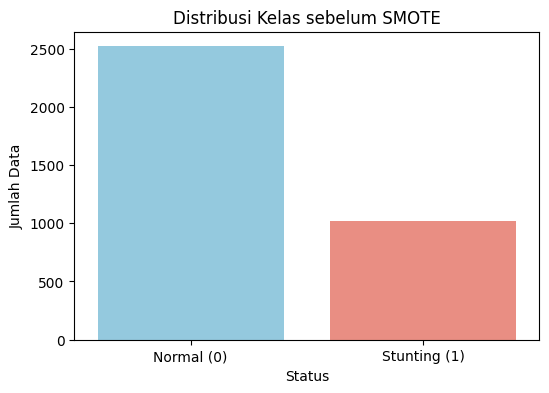

In [49]:
status_counts_after_smote = y1.value_counts()

plt.figure(figsize=(6, 4))
# Menggunakan palet warna yang berbeda untuk dua batang
sns.barplot(x=status_counts_after_smote.index, y=status_counts_after_smote.values, palette=['skyblue', 'salmon'])
plt.title('Distribusi Kelas sebelum SMOTE')
plt.xlabel('Status')
plt.ylabel('Jumlah Data')
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Stunting (1)'])
plt.show()

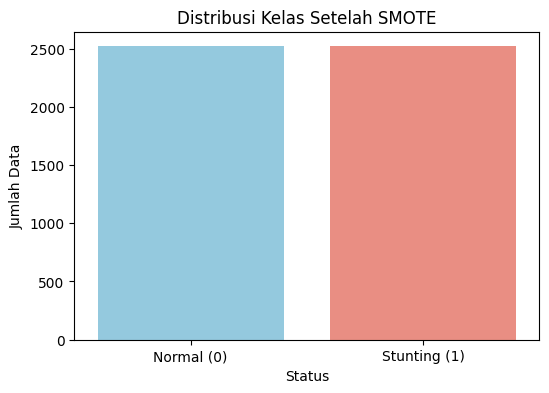

In [50]:
status_counts_after_smote = y_sm.value_counts()

plt.figure(figsize=(6, 4))
# Menggunakan palet warna yang berbeda untuk dua batang
sns.barplot(x=status_counts_after_smote.index, y=status_counts_after_smote.values, palette=['skyblue', 'salmon'])
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Status')
plt.ylabel('Jumlah Data')
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Stunting (1)'])
plt.show()


**SPLITDATA**

In [51]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [52]:
y_train1.value_counts()

,count
status,
1,2045
0,1985


In [53]:
y_test1.shape

(1008,)

In [54]:
X_train1.shape

(4030, 57)

In [55]:
X_test1.shape

(1008, 57)

# **MODELLING**

In [56]:
xgb = XGBClassifier(random_state=42)

xgb.fit(X_train1, y_train1)
y_pred = xgb.predict(X_test1)


Train akurasi: 0.9920595533498759
Test akurasi: 0.8313492063492064
Train AUC: 0.999501518109538
Test AUC: 0.9223083487412885
Classification Report Model :               precision    recall  f1-score   support

           0       0.85      0.83      0.84       534
           1       0.82      0.83      0.82       474

    accuracy                           0.83      1008
   macro avg       0.83      0.83      0.83      1008
weighted avg       0.83      0.83      0.83      1008

Confusion Matrix Model : Axes(0.125,0.11;0.62x0.77)


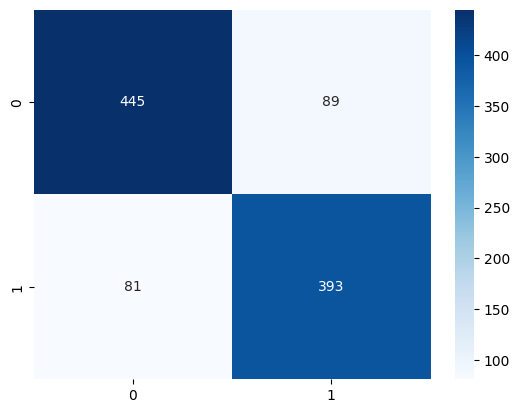

In [57]:
y_train_predxgb = xgb.predict(X_train1)
y_test_predxgb = xgb.predict(X_test1)
y_train_pred1xgb = xgb.predict_proba(X_train1)[:,1]
y_test_pred1xgb = xgb.predict_proba(X_test1)[:,1]


cm = confusion_matrix(y_test1, y_test_predxgb)
print('Train akurasi:', accuracy_score(y_train1, y_train_predxgb))
print('Test akurasi:', accuracy_score(y_test1, y_test_predxgb))
print("===================================================================")
print('Train AUC:', roc_auc_score(y_train1, y_train_pred1xgb))
print('Test AUC:', roc_auc_score(y_test1, y_test_pred1xgb))
print("===================================================================")
print("Classification Report Model :",classification_report(y_test1, y_test_predxgb))
print("Confusion Matrix Model :",sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues))
print("===================================================================")

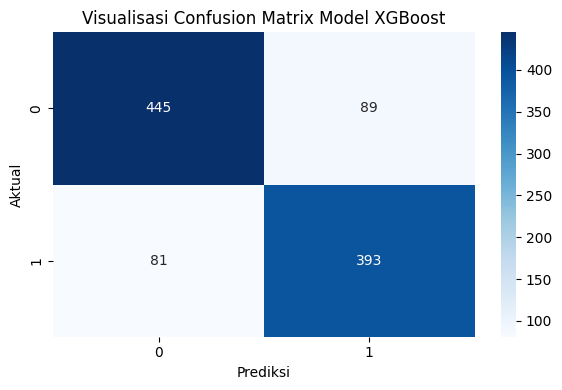

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Contoh jika cm sudah dihitung sebelumnya:
# cm = confusion_matrix(y_test, y_pred)

# Label kelas (ubah sesuai kebutuhan)
labels = ['0', '1']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues,
                      xticklabels=labels, yticklabels=labels)

# Tambahkan judul dan label sumbu
plt.title("Visualisasi Confusion Matrix Model XGBoost")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.tight_layout()
plt.show()


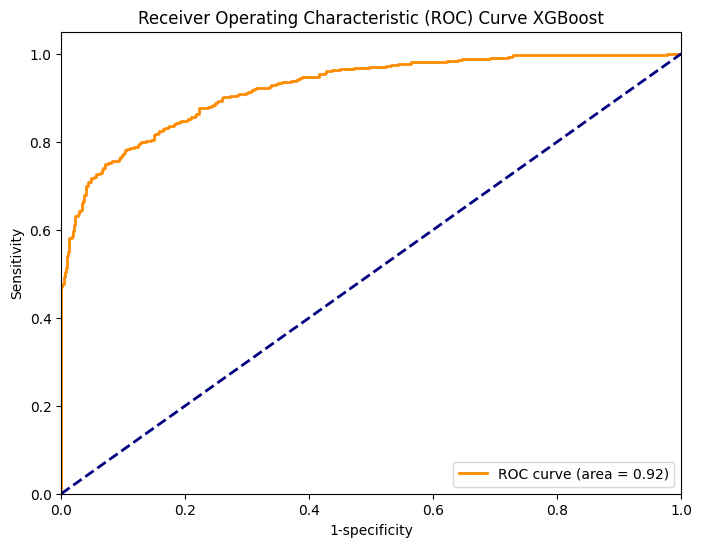

In [59]:
# prompt: code untuk membuat grafik roc auc

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_test_pred1xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test1, y_test_pred1xgb):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve XGBoost')
plt.legend(loc='lower right')
plt.show()


# **WITH BAYESIAN SEARCH CV**

In [60]:
paramsgb={
   'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'reg_lambda': Real(1e-9, 100., 'log-uniform'),
    'gamma': Real(1e-9, 0.2, 'log-uniform'),
    'n_estimators': Integer(1, 700),
    'subsample': Real(0.1, 1.0, 'uniform'),
    'colsample_bytree': Real(0.1,1.0, 'uniform'),
}

gb = XGBClassifier(
    # n_jobs =1,
    # booster = 'gbtree',
    # objective = 'binary:logistic',
    # eval_metric = 'auc',
    # tree_method = 'hist',
    # verbosity = 0,
    # use_label_encoder=False,
    random_state=42,
    # early_stopping_rounds = 30,
    # enable_categorical = True
)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
bayes2 = BayesSearchCV(
    estimator=gb,
    search_spaces=paramsgb,
    cv=skf,
    n_iter=30,
    # n_points =15,
    scoring='accuracy',
    # iid = False,
    # refit= True,
    n_jobs=-1,
    verbose=1,
    random_state= 42,
    return_train_score=True,

)

# fit_params = {
#     "eval_set": [(X_test1, y_test)],
#     "early_stopping_rounds": 20,
#     "verbose": False
# }

%time bayes2.fit( X_train1, y_train1)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_pol...
                             'gamma': Real(low=1e-09, high=0.2, prior='log-uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=700, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-09, high=100.0, prior='log-uniform', transform='normalize'),
                             'subsample': Real(low=0.1, high=1.0, prior='uniform', transform='normalize')},
              verbose=1)

In [61]:
print('Best parameters:')
print(bayes2.best_params_)
print("Best score = %.3f after %d runs" % (bayes2.best_score_, bayes2.n_iter))

Best parameters:
OrderedDict([('colsample_bytree', 0.3181978473821977), ('gamma', 0.2), ('learning_rate', 0.04567872348758396), ('n_estimators', 407), ('reg_lambda', 1e-09), ('subsample', 1.0)])
Best score = 0.819 after 30 runs


Train akurasi: 0.9424317617866005
Test akurasi: 0.8353174603174603
Train AUC: 0.989672051387854
Test AUC: 0.9241019927622118
Classification Report Model :               precision    recall  f1-score   support

           0       0.83      0.87      0.85       534
           1       0.84      0.80      0.82       474

    accuracy                           0.84      1008
   macro avg       0.84      0.83      0.83      1008
weighted avg       0.84      0.84      0.83      1008

Confusion Matrix Model : Axes(0.125,0.11;0.62x0.77)
Feature Importances: [0.01518195 0.01602506 0.00939805 0.01513754 0.07086177 0.03914496
 0.02540536 0.02450736 0.03157528 0.02869185 0.0106729  0.01528392
 0.02472214 0.0134873  0.01595228 0.01525126 0.01679163 0.0380409
 0.01789949 0.01573221 0.01494407 0.00884139 0.01249325 0.02260644
 0.02782077 0.01405137 0.02277742 0.01705019 0.01204581 0.01284613
 0.01191278 0.0115318  0.03089025 0.00213829 0.031562   0.01291685
 0.01432684 0.01363636 0.00977003 0.0093032 

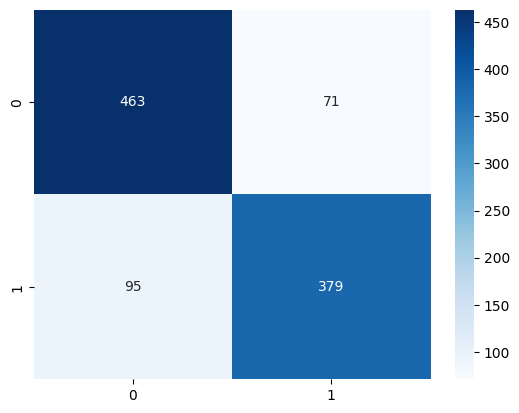

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
y_train_predb = bayes2.predict(X_train1)
y_test_predb = bayes2.predict(X_test1)
y_train_pred1b = bayes2.predict_proba(X_train1)[:,1]
y_test_pred1b = bayes2.predict_proba(X_test1)[:,1]


cm1 = confusion_matrix(y_test1, y_test_predb)
print('Train akurasi:', accuracy_score(y_train1, y_train_predb))
print('Test akurasi:', accuracy_score(y_test1, y_test_predb))
print("===================================================================")
print('Train AUC:', roc_auc_score(y_train1, y_train_pred1b))
print('Test AUC:', roc_auc_score(y_test1, y_test_pred1b))
print("===================================================================")
print("Classification Report Model :",classification_report(y_test1, y_test_predb))
print("Confusion Matrix Model :",sns.heatmap(cm1, annot=True, fmt='.0f', cmap=plt.cm.Blues))
print("===================================================================")
print("Feature Importances:", bayes2.best_estimator_.feature_importances_)

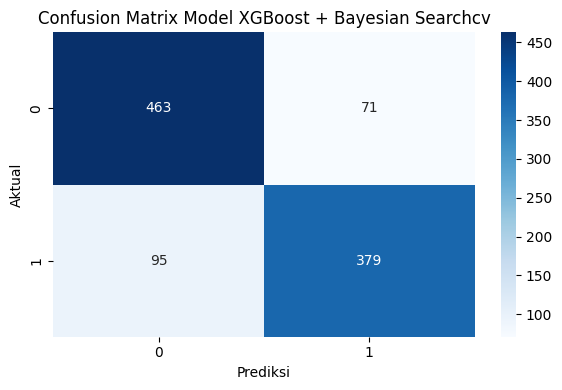

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Contoh jika cm sudah dihitung sebelumnya:
# cm = confusion_matrix(y_test, y_pred)

# Label kelas (ubah sesuai kebutuhan)
labels = ['0', '1']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(cm1, annot=True, fmt='.0f', cmap=plt.cm.Blues,
                      xticklabels=labels, yticklabels=labels)

# Tambahkan judul dan label sumbu
plt.title("Confusion Matrix Model XGBoost + Bayesian Searchcv")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.tight_layout()
plt.show()


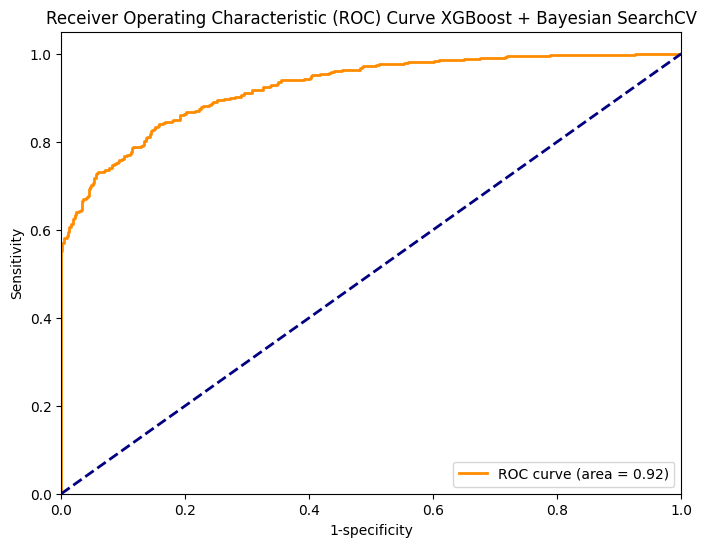

In [64]:
# prompt: code untuk membuat grafik roc auc

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_test_pred1b)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test1, y_test_pred1b):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve XGBoost + Bayesian SearchCV')
plt.legend(loc='lower right')
plt.show()


In [65]:
xgb_clf_tuned = XGBClassifier(
        early_stopping_rounds=10,
        eval_metric='auc',
        objective = 'binary:logistic',
        booster ='gbtree',
        tree_method = 'hist',
        eval_set=[(X_test1, y_test1)],
         **bayes2.best_params_
)

In [66]:
xgb_clf_tuned.fit(
    X_train1,
    y_train1,
    eval_set=[(X_test1, y_test1)],
    verbose=True,
)

[0]	validation_0-auc:0.76832
[1]	validation_0-auc:0.84037
[2]	validation_0-auc:0.84656
[3]	validation_0-auc:0.85649
[4]	validation_0-auc:0.87116
[5]	validation_0-auc:0.87237
[6]	validation_0-auc:0.88206
[7]	validation_0-auc:0.88256
[8]	validation_0-auc:0.88073
[9]	validation_0-auc:0.88334
[10]	validation_0-auc:0.88820
[11]	validation_0-auc:0.88870
[12]	validation_0-auc:0.88857
[13]	validation_0-auc:0.89086
[14]	validation_0-auc:0.89408
[15]	validation_0-auc:0.89518
[16]	validation_0-auc:0.89549
[17]	validation_0-auc:0.89569
[18]	validation_0-auc:0.89641
[19]	validation_0-auc:0.89682
[20]	validation_0-auc:0.89690
[21]	validation_0-auc:0.89715
[22]	validation_0-auc:0.89915
[23]	validation_0-auc:0.89902
[24]	validation_0-auc:0.89906
[25]	validation_0-auc:0.89959
[26]	validation_0-auc:0.90029
[27]	validation_0-auc:0.90123
[28]	validation_0-auc:0.90181
[29]	validation_0-auc:0.90268
[30]	validation_0-auc:0.90325
[31]	validation_0-auc:0.90362
[32]	validation_0-auc:0.90387
[33]	validation_0-au

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3181978473821977, device=None,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric='auc',
              eval_set=[(array([[-0.6349918 ,  0.28087911,  0.79090892, ..., -0.50432069,
         0.41394802, -0.41394802],
       [-0.35622147, -0.97534875, -0.1121356...
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04567872348758396,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=407, n_jobs=None, ...)

Train akurasi: 0.8942928039702234
Test akurasi: 0.8472222222222222
Train AUC: 0.9671180553417131
Test AUC: 0.9265909701480745
Classification Report Model :               precision    recall  f1-score   support

           0       0.84      0.88      0.86       534
           1       0.86      0.81      0.83       474

    accuracy                           0.85      1008
   macro avg       0.85      0.85      0.85      1008
weighted avg       0.85      0.85      0.85      1008

Confusion Matrix Model : Axes(0.125,0.11;0.62x0.77)
Feature Importances: [0.01518195 0.01602506 0.00939805 0.01513754 0.07086177 0.03914496
 0.02540536 0.02450736 0.03157528 0.02869185 0.0106729  0.01528392
 0.02472214 0.0134873  0.01595228 0.01525126 0.01679163 0.0380409
 0.01789949 0.01573221 0.01494407 0.00884139 0.01249325 0.02260644
 0.02782077 0.01405137 0.02277742 0.01705019 0.01204581 0.01284613
 0.01191278 0.0115318  0.03089025 0.00213829 0.031562   0.01291685
 0.01432684 0.01363636 0.00977003 0.0093032

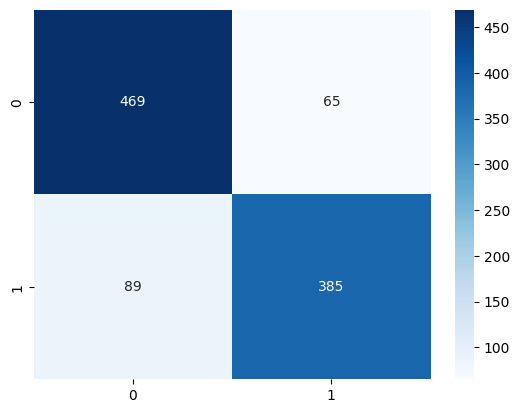

In [67]:


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
y_train_pred = xgb_clf_tuned.predict(X_train1)
y_test_pred = xgb_clf_tuned.predict(X_test1)
y_train_pred1 = xgb_clf_tuned.predict_proba(X_train1)[:,1]
y_test_pred1 = xgb_clf_tuned.predict_proba(X_test1)[:,1]


cm2 = confusion_matrix(y_test1, y_test_pred)
print('Train akurasi:', accuracy_score(y_train1, y_train_pred))
print('Test akurasi:', accuracy_score(y_test1, y_test_pred))
print("===================================================================")
print('Train AUC:', roc_auc_score(y_train1, y_train_pred1))
print('Test AUC:', roc_auc_score(y_test1, y_test_pred1))
print("===================================================================")
print("Classification Report Model :",classification_report(y_test1, y_test_pred))
print("Confusion Matrix Model :",sns.heatmap(cm2, annot=True, fmt='.0f', cmap=plt.cm.Blues))
print("===================================================================")
print("Feature Importances:", bayes2.best_estimator_.feature_importances_)
#


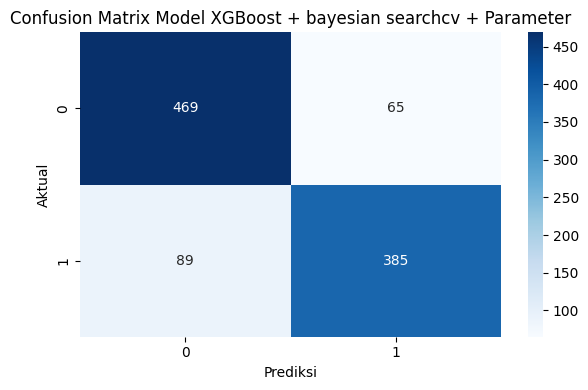

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Contoh jika cm sudah dihitung sebelumnya:
# cm = confusion_matrix(y_test, y_pred)

# Label kelas (ubah sesuai kebutuhan)
labels = ['0', '1']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(cm2, annot=True, fmt='.0f', cmap=plt.cm.Blues,
                      xticklabels=labels, yticklabels=labels)

# Tambahkan judul dan label sumbu
plt.title("Confusion Matrix Model XGBoost + bayesian searchcv + Parameter")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.tight_layout()
plt.show()


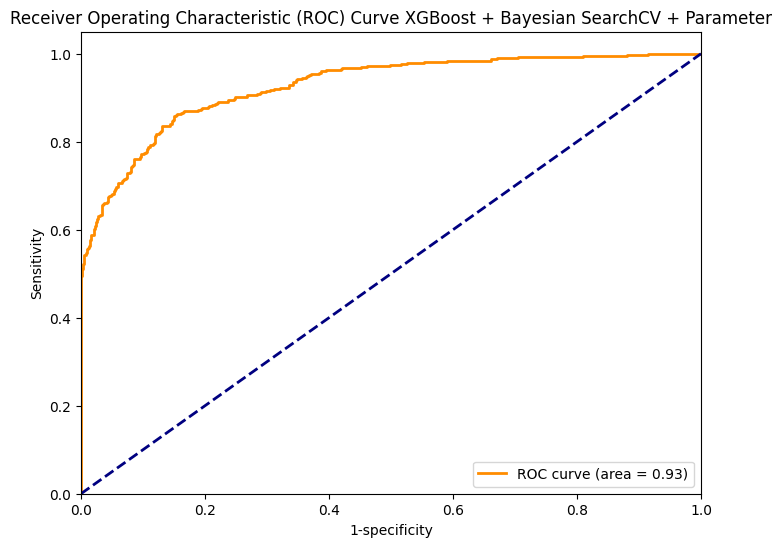

In [69]:

# prompt: code untuk membuat grafik roc auc

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_test_pred1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test1, y_test_pred1):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve XGBoost + Bayesian SearchCV + Parameter')
plt.legend(loc='lower right')
plt.show()


Sorted Feature Importances:
wi_poor                                           0.070862
wi_rich                                           0.039145
chDrug_yes                                        0.038041
radio_no                                          0.031575
db_still breastfeeding                            0.031562
db_ever breastfed, not currently breastfeeding    0.030890
chSex_f                                           0.029101
radio_yes                                         0.028692
region_west                                       0.027821
tv_no                                             0.025405
chSex_m                                           0.025243
MmEdu_second or higher                            0.024722
tv_yes                                            0.024507
toilet_unimproved                                 0.022777
region_south                                      0.022606
nChild_more than 3                                0.022516
nChild_2 child              

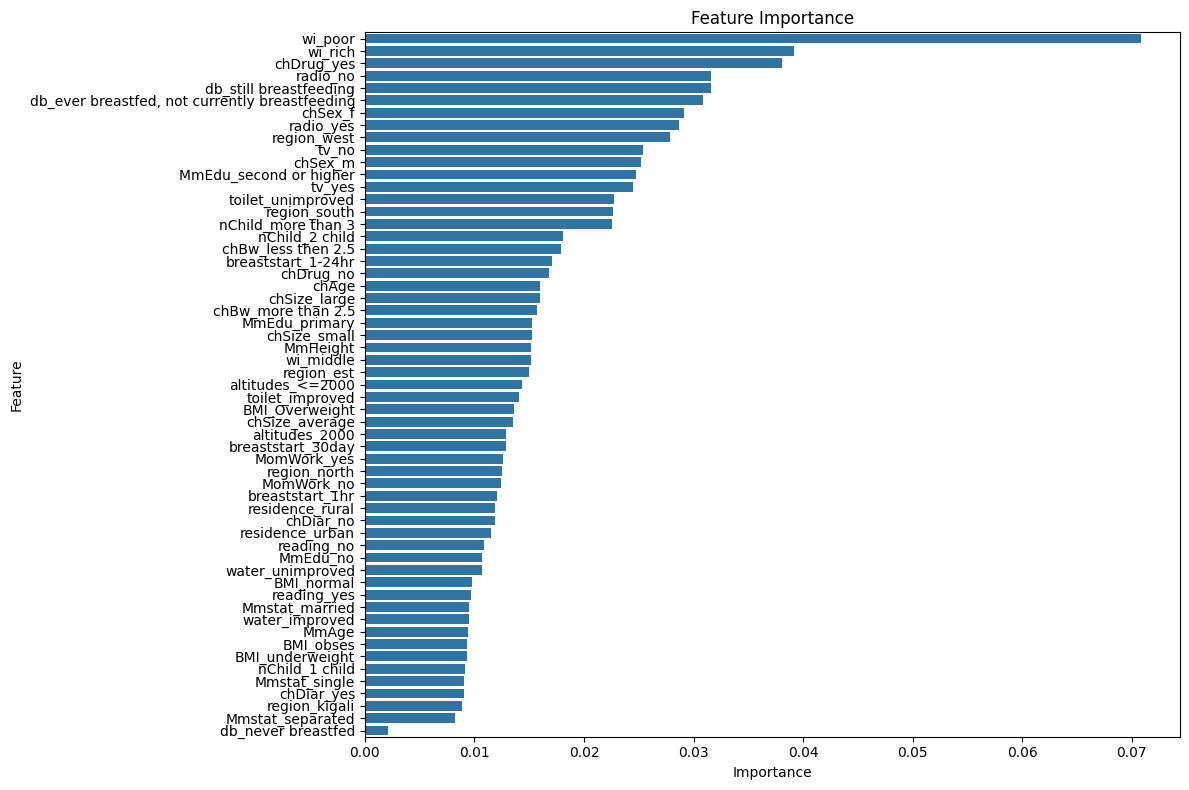

In [70]:
# prompt: code untuk menampilkan fitur importance

import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances from the best estimator found by BayesSearchCV
feature_importances = bayes2.best_estimator_.feature_importances_

# Get the names of the features
feature_names = X1.columns

# Create a pandas Series for better visualization and sorting
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Sorted Feature Importances:")
print(sorted_feature_importance)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importance.values, y=sorted_feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [71]:
import pickle
with open('xgb_clf_tuned_pickle', 'wb') as r:
    pickle.dump(xgb_clf_tuned, r)

In [72]:
with open('xgb_clf_tuned_pickle', 'rb') as r:
    xgbp = pickle.load(r)

In [74]:
y_pred = xgbp.predict(X_test1)
round(accuracy_score(y_test1, y_pred), 2)

0.85

In [ ]:
input_data =()
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = xgbp.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0 ):
  print('Balita Normal')
else:
  print("Balita Stunting")

In [75]:
file='stuting_preduksi.sav'
pickle.dump(xgb_clf_tuned,open(file,'wb'))